<a href="https://colab.research.google.com/github/minalang/study_code_paper/blob/main/%EC%BD%94%ED%85%8C%EC%9D%B8%EA%B0%95_dfs%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DFS, BFS

## [선수지식] 재귀함수와 스택

In [ ]:
def DFS_srt(x):
  if x>0:
    DFS_srt(x-1)
    print(x, end = ' ')

def DFS_reversed(x):
  if x>0:
    print(x,  end = ' ')
    DFS_reversed(x-1)

In [ ]:
n = 3

DFS_srt(n) #출력값 1 2 3
print('\n')
DFS_reversed(n) #출력값 3 2 1

1 2 3 

3 2 1 

왜? 재귀함수가 stack을 사용하기 때문

## 1. 재귀함수를 이용한 이진수 출력

10진수 N이 입력되면 2진수로 변환하여 출력하는 프로그램 작성<br>

입력: 11 출력: 1011

** 출력의 순서를 바꾸고 싶다면 함수 내에서 순서를 바꾸면 됨! **

In [ ]:
def binary(x):
  if x==0:
    return
  else:
    binary(x//2) # 몫으로 호출
    print(x%2, end = '')


if __name__ == "__main__":
  n = int(input())
  binary(n)

11
1011

## 2. 이진트리 순회(DFS)

아래 그림과 같은 이진트리를 전위순회와 후위순회를 연습해보세요

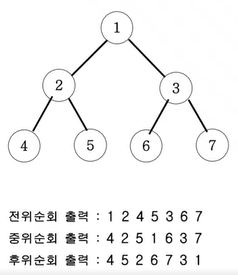

재귀를 이용한 깊이우선탐색
- 전위순회: 부모먼저->왼쪽자식->오른쪽자식<br>
순회하는 본연의 노드값을 먼저 출력하고 탐색하는 것
- 중위순회: 왼쪽자식->부모->오른쪽자식
- 후위순회: 왼쪽자식->오른쪽자식->부모

왼쪽자식은 *2, 오른쪽 자식은 *2+1

In [ ]:
# 초심자의 깊이우선 탐색은 if else구문으로
# 숫자의 범위를 보고 함수를 종료할 조건을 if에, 가지를 뻗을 조건을 else로 해서 뻗어가기

## 전위순회방식: 보통완전탐색에서는 전위순회방식임
def DFS1(v):
  if v>7:
    return #함수를 종료
  else:
    print(v, end = ' ') #부모의 노드를 출력함
    DFS1(v*2) #부모의 왼쪽 노드로 가지를 뻗음
    DFS1(v*2+1) #부모의 오른쪽 노드 가지를 뻗음

if __name__ == "__main__":
  DFS1(1)

1 2 4 5 3 6 7 

In [ ]:
## 중위순회방식
def DFS2(v):
  if v>7:
    return # 함수 종료
  else:
    DFS2(v*2) # 부모의 왼쪽노드로 가지를 뻗음
    print(v, end = ' ') # 부모가 중간에서 처리됨
    DFS2(v*2+1) # 부모의 오른쪽 노드로 가지를 뻗음

if __name__ == "__main__":
  DFS2(1)

4 2 5 1 6 3 7 

In [ ]:
## 후위순회방식
## 병합정렬에서 후위순회가 대표적으로 쓰인다.
def DFS3(v):
  if v>7:
    return # 함수 종료
  else:
    DFS3(v*2) # 부모의 왼쪽노드로 가지를 뻗음
    DFS3(v*2+1) # 부모의 오른쪽 노드로 가지를 뻗음
    print(v, end = ' ') # 부모가 마지막으로 처리됨

if __name__ == "__main__":
  DFS3(1)

4 5 2 6 7 3 1 

## 3. 부분집합 구하기

자연수 N이 주어지면 1부터 N까지의 원소를 갖는 집합의 부분집합을 모두 출력하는 프로그램 작성<br>
- 입력: 자연수(1~10)
- 출력 깊이우선탐색 전위순회방식으로 출력
- 입력예제: 3
- 출력예제:<br>
1 2 3<br>
1 2<br>
1 3<br>
1<br>
2 3<br>
2<br>
3



*상태트리*를 구축
dfs(1) -> 넣을건지, 넣지않느냐<br>
dfs(2) -> 넣을건지, 넣지않느냐<br>
dfs(3) -> 넣을건지, 넣지않느냐<br>
총 8가지 경우의 수 출력 + 공집합을 뺌


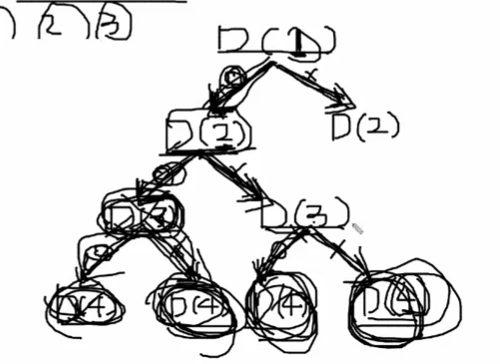

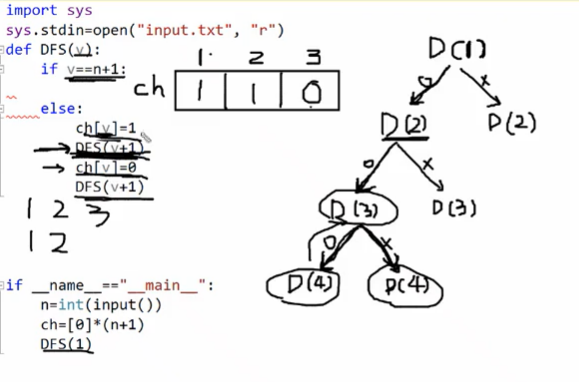

In [ ]:
def DFS(v):
  if v==n+1: # 종료지점, ch에 체크된 인덱스를 출력해줌
    for i in range(1, n+1):
      if ch[i] == 1:
        print(i, end = ' ')
    print()
  else:
    ch[v] = 1 # 사용한다는 것으로 호출이 넘어갈 때
    DFS(v+1)
    ch[v] = 0 #사용하지 않는다는 것으로 호출이 넘어갈 때
    DFS(v+1)


if __name__ == "__main__":
  n = int(input('input: '))
  ch = [0]*(n+1)
  #원소를 사용했는지 아닌지를 알려주는 check변수, 넉넉하게 n+1개로 함
  DFS(1)

input: 3
1 2 3 
1 2 
1 3 
1 
2 3 
2 
3 



## 4. 합이 같은 부분집합(DFS)
N개의 원소로 구성된 자연수 집합이 주어지면, 이 집합을 두 개의 부분집합으로 나누었을 때 두 부분집합의 원소의 합이 서로 같은 경우가 존재하면 YES를 출력하고, 그렇지 않으면 NO를 출력하는 프로그램을 작성하시오.<br>
예: {1, 3, 5, 6, 7,10}이면<br>
{1, 3, 5, 7} = {6, 10}으로 합이 같

첫번째 원소: 자연수 N(1~10)<br>

두번째 원소: 집합의 원소N개가 주어짐<br>

왼쪽은 사용하겠다<br>
오른쪽은 사용하지않겠다


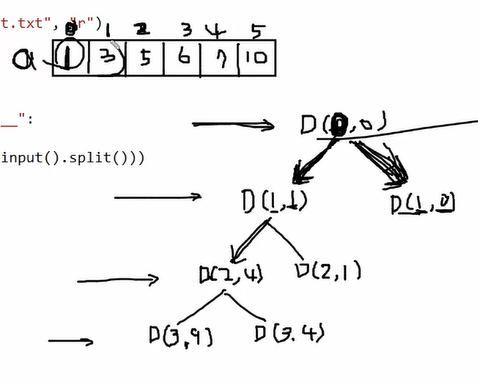

In [ ]:
import sys

def DFS(L, sum):
  #level의 값, sum의 값
  #level이 원소의 개수가 되었을 때 멈춤
  if L == n:
    if sum == (total-sum):
      print('YES')
      sys.exit(0)#프로그램 종료
  else:
    DFS(L+1, sum+a[L]) #원소로 사용할 때
    DFS(L+1, sum) #원소로 사용하지 않을 때


if __name__ == "__main__":
  n = int(input())
  a = list(map(int, input().split()))
  total = sum(a)
  DFS(0, 0)
  #프로그램이 종료되고 여기로 다시 복귀했을 때
  print("NO")

#### 시간복잡도 줄이기
sum이 total의 절반을 넘었다면 그 밑으로 가닥을 뻗을 필요가 있을까? 아님!<br>
총합이 홀수인 경우 //2했을 때 같은 자연수가 나올 수 있어 홀수에서는 //2는 하면 안됨 ☘


In [ ]:
# 시간복잡도 줄이기
import sys

def DFS(L, sum):
  #level의 값, sum의 값
  #level이 원소의 개수가 되었을 때 멈춤
  if sum>total//2:
    return # 총합 절반 이상이면 계산하지않음


  if L == n:
    if sum == (total-sum):
      print('YES')
      sys.exit(0)#프로그램 종료
  else:
    DFS(L+1, sum+a[L]) #원소로 사용할 때
    DFS(L+1, sum) #원소로 사용하지 않을 때


if __name__ == "__main__":
  n = int(input())
  a = list(map(int, input().split()))
  total = sum(a)
  DFS(0, 0)
  #프로그램이 종료되고 여기로 다시 복귀했을 때
  print("NO")

### 잠깐 지식 전역변수와 지역변수
전역변수:
- 메인 스크립트에서 선언
- 변수가 생성되고 값이 할당됨
- 모든 함수가 접근할 수 있음(공통)

지역변수:
- 함수 안에 있음(먼저 우선하게 찾음)




In [ ]:
def DFS1():
  cnt=3 # cnt라는 변수를 만들고 3을 할당함, 지역변수를 만듦
  print(cnt) # 이건 이제 3을 출력함

def DFS2():
  global cnt # 전역변수군
  if cnt == 5:
    cnt = cnt+1
    print(cnt) #전역변수를 바꿨음


if __name__ == '__main__':
  cnt = 5
  DFS1()
  DFS2()
  print(cnt) #그래서 여기도 6이 됨

3
6
6


In [ ]:
# 리스트는?

def DFS():
  a[0] = 7 #새로운 리스트를 생성한게 아니라 단순히 값을 바꿔준 것
  print(a)

if __name__ == '__main__':
  a = [1, 2, 3] #전역 리스트
  DFS()
  print(a)

In [ ]:
def DFS():
  a = a+[4] #아무것도 할당되지않은 지역 리스트에 새로운 리스르를 더할 수 없음
  print(a)

if __name__ == '__main__':
  a = [1, 2, 3] #전역 리스트
  DFS()
  print(a)

UnboundLocalError: local variable 'a' referenced before assignment

In [ ]:
def DFS():
  global a #글로벌 리스트도 가능함!_!
  a = a+[4] #아무것도 할당되지않은 지역 리스트에 새로운 리스트를 더할 수 없음
  print(a)

if __name__ == '__main__':
  a = [1, 2, 3] #전역 리스트
  DFS()
  print(a)

[1, 2, 3, 4]
[1, 2, 3, 4]


## 5. 바둑이 승차(DFS)
(4번 문제와 유사)<br>
철수는 그의 바둑이들을 데리고 시장에 가려고 한다. 그런데 그의 트럭은 C킬로그램 넘게 태울 수가 없다. 철수는 C를 넘지 않으면서 그의 바둑이들을 무겁게 태우고 싶다.
N마리의 바득이와 각 바둑이의 무게 W가 주어지면, 철수가 철수가 트럭에 태울 수 있는 가장 무거운 무게를 구하는 프로그램을 작성하세요.

- 입력설명
자연수 C와 N(1<=N<=30)이 주어짐.둘째줄부터 N마리의 바둑이의 무게가 주어짐
- 출력
첫번째 줄에서 가장 무거운 무게를 출력

In [ ]:
# 여러 경우의 수가 있을 것 같음
## 내 풀이

def DFS(L, sum):
  if L == num:
    if sum <= c:
      c_list.append(sum)
    else:
      return
    return
  else:
    DFS(L+1, sum+input_list[L]) #원소로 사용할 때
    DFS(L+1, sum) #원소로 사용하지 않을 때


if __name__ == "__main__":
  c_list = []
  c, num = map(int, input().split())
  input_list = []
  for i in range(num):
    a = int(input())
    input_list.append(a)

  DFS(0, 0)
  print(c_list)
  print(max(c_list))

259 5
81
58
42
33
61
[214, 242, 181, 233, 172, 200, 139, 217, 156, 184, 123, 175, 114, 142, 81, 194, 133, 161, 100, 152, 91, 119, 58, 136, 75, 103, 42, 94, 33, 61, 0]
242


In [ ]:
## 선생님 풀이: 시간초과가 난다..!

import sys
from collections import deque
def DFS(L, sum): #level, sum
  global result
  if sum>c: #무게제한 설정
    return
  if L == n: #부분집합 하나가 완성되는 말단노드에 도착!
    if sum > result: #여기서 초기화안했으니..
      result = sum #재할당했으니 로컬변수인데
    else:
      DFS(L+1, sum+a[L]) # 그 다음 원소를 포함(왼쪽으로 뻗음)
      DFS(L+1, sum) # 그 다음 원소를 포함하지 않음(오른쪽으로 뻗음)

if __name__ == '__main__':
  c, n = map(int, input().split())
  a = [0]*n
  result = -21470000000
  for i in range(n):
    a[i] = int(input())
  DFS(0, 0)
  print(result)


In [ ]:
## 시간초과 피하는 선생님 풀이

import sys
from collections import deque
def DFS(L, sum, tsum): #level, sum, tsum(판단을 한 무게)
  global result #전역변수로 선언하기
  # 앞으로 판단해야할 무게(total-sum)
  if sum+(total-tsum) < result: #result보다 좋은 무게가 안나온다
    return

  if sum>c: #무게제한 설정
    return
  if L == n: #부분집합 하나가 완성되는 말단노드에 도착!
    if sum > result: #여기서 초기화안했으니..
      result = sum #재할당했으니 로컬변수인데
    else:
      # 판단을 한 무게(tsum+a[L])
      DFS(L+1, sum+a[L], tsum+a[L]) # 그 다음 원소를 포함(왼쪽으로 뻗음)
      DFS(L+1, sum, tsum+a[L]) # 그 다음 원소를 포함하지 않음(오른쪽으로 뻗음)

if __name__ == '__main__':
  c, n = map(int, input().split())
  a = [0]*n
  result = -21470000000
  for i in range(n):
    a[i] = int(input())
  total = sum(a)
  DFS(0, 0, 0)
  print(result)

## 6. 중복순열 구하기(DFS)

1부터 N까지 번호가 적힌 구슬이 있습니다. 이 중 중복을 허락하여 M번을 뽑아 일렬로 나열하는 방법 모두 출력
- 입력
첫번째 줄에 N(3<=N<=10), M(2<=M<=N)
- 출력
첫번째 줄에 결과를 출력, 맨 마지막 총 경우의 수를 출력
출력 순서는 사전순으로 오름차순

In [ ]:
import sys
#input = sys.stdin.readline
#s = input().rstrip() # 문자열 입력일 때 줄바꿈기호까지 같이 읽기때문에 지워주기

def DFS(L):
  global cnt
  if L == m:
    for j in res:
      print(j, end = ' ')
    print() #줄바꿈
    # print(' '.join(res))
    # for j in range(m):
    #   print(res[j], end = ' ')
    #   print()
    cnt+=1 #res를 출력
  else:
    for i in range(1, n+1):
      res[L] = i
      DFS(L+1)

if __name__ == "__main__":
  n, m = map(int, input().split())
  res = [0]*m
  cnt = 0
  DFS(0)
  print(cnt)

3 2
1 1 
1 2 
1 3 
2 1 
2 2 
2 3 
3 1 
3 2 
3 3 
9


## 7. 동전교환
다음과 같이 여러 단위의 동전들이 주어져 있을 때 거스름돈을 가장 적은 수의 동전으로 교환해주려면 어떻게 주면 되는가? 각 단위의 동전은 무한정 쓸 수 있다
<br>
첫 번째 줄 동전의 종류 개수(1<=N<=12)<br>
두 번째 줄에는 N개의 동전종류, 거슬러줄 금액M(1<=M<=500)이 주어짐<br>
각 동전의 종류는 100원을 넘지 않는다.<br>
거슬러 줄 동전의 최소개수를 출력<br>

예시 <br>
3<br>
1 2 5<br>
15<br>
5 5 5 동전 3개로 거슬러 줄 수 있다.

In [ ]:
# 스스로 풀려고 노력함 - 잘 안됨ㅠㅅㅠ
def DFS(L, sum):
  sum = 0
  for i in range(len(n_list)):
    sum+=res[i]*n_list[i]
  if sum == m:
    cnt_list.append(sum(res))
  else:

    for i in range(len_list)):
      res[L] = i
      DFS(L+1)

if __name__ == "__main__":
  n = int(input())
  n_list = list(map(int, input().split()))
  m = int(input()) #더하면 m이 나와야함
  res = [0]*len(n_list)
  cnt_list = []
  DFS(0, 0)
  print(min(cnt_list))

3
1 2 5
15


IndexError: list assignment index out of range

In [ ]:
def DFS(L, sum): #L이 사용하는 동전의 수, sum이 합한 동전 수
  global res
  if sum>m:
    return
  if sum == m:
    if L<res: #지역변수가 됨
      res = L #값을 바꾸니까
  else:
    for i in range(n):
      DFS(L+1, sum+a[i]) #합을 이런식으로 더해나감

if __name__ == "__main__":
  n = int(input())
  a = list(map(int, input().split())) #동전의 종류
  m = int(input()) #더하면 m이 나와야함
  res = 2147000000
  a.sort(reverse = True) #큰 금액부터 탐색하기
  DFS(0, 0)
  print(res)

3
1 2 5
15
3


In [ ]:
## cut-off edge

def DFS(L, sum): #L이 사용하는 동전의 수, sum이 합한 동전 수
  global res
  if L>res: #L이 지금 구한 최솟값보다 큰데 sum이 m보다 작은 경우 더 구할 필요가 없다
    return
  if sum>m:
    return
  if sum == m:
    if L<res: #지역변수가 됨
      res = L #값을 바꾸니까
  else:
    for i in range(n):
      DFS(L+1, sum+a[i]) #합을 이런식으로 더해나감

if __name__ == "__main__":
  n = int(input())
  a = list(map(int, input().split())) #동전의 종류
  m = int(input()) #더하면 m이 나와야함
  res = 2147000000
  a.sort(reverse = True) #큰 금액부터 탐색하기
  DFS(0, 0)
  print(res)

## 8. 순열 구하기
1부터 N까지 번호가 적힌 구슬이 있다. 이 중 M개를 뽑아 일렬로 나열하는 방법 모두 출력<br>

첫째줄 자연수 N과 M<br>
결과 출력하기. 맨 마지막에 총 경우의 수 출력하기

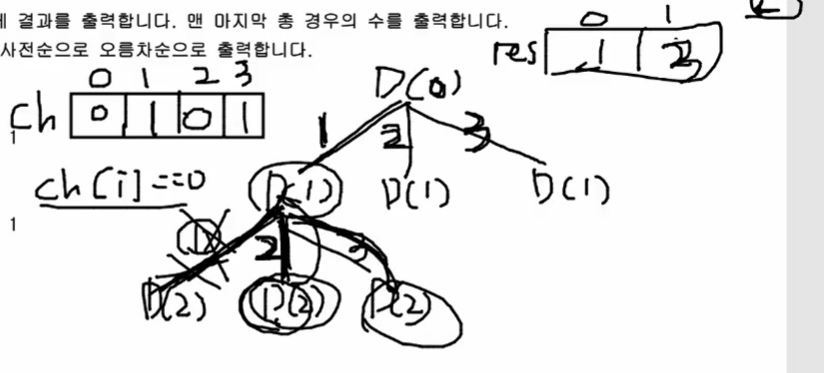

In [ ]:
# 중복이 아닌 순열
## 체크리스트(ch)를 만들어 중복인지 아닌지 확인하도록함(수가 포함되었을 때는 1, 상태 트리가 다시 돌아갈 때는 0으로 업데이트 해주어야함)

def DFS(L): #level이 m이면 멈추고 출력하면 됨
  global cnt
  if L == m:
    for j in res:
      print(j, end = ' ')
    print() # 줄바꿈
    cnt+=1
    # ch푸는게 이 지점일 것 같은데 어떻게 해야하는지 모르겠음->알고보니 여기가 아니었음
  else:
    for i in range(1, n+1):
      if ch[i] == 1:
        return #아예 for loop을 나가게 되어 다른 답이 나오게됨
      else:
        ch[i] = 1
        res[L] = i ##이거 빼먹음!! 첫번쨰에 넣은 수
        DFS(L+1)
        ##### 여기에 넣으면 됨 #####
        ch[i] = 0 #했던 행동을 취소시켜줌: 되돌아 왔을 때 1을 넣었던 부분을 취소해주는 역할


if __name__  == "__main__":
  n, m = map(int, input().split(' '))
  cnt = 0
  res = [0]*m
  ch = [0]*(n+1)
  DFS(0)
  print(cnt)

3 2
2 1 
3 1 
3 2 
3


In [ ]:
def DFS(L): #level이 m이면 멈추고 출력하면 됨
  global cnt
  if L == m:
    for j in res:
      print(j, end = ' ')
    print() # 줄바꿈
    cnt+=1
    # ch푸는게 이 지점일 것 같은데 어떻게 해야하는지 모르겠음
  else:
    for i in range(1, n+1):
      if ch[i] == 1:
        pass #break나 return으로 멈추면 아예 for loop을 나가게 되니까 pass나 continue로 이어갈 수 있게 해주는게 맞음!!
      else:
        ch[i] = 1
        res[L] = i ##이거 빼먹음!! 첫번째에 넣은 수
        DFS(L+1)
        ##### 여기에 넣으면 됨 #####
        ch[i] = 0 #했던 행동을 취소시켜줌: 되돌아 왔을 때 1을 넣었던 부분을 취소해주는 역할


if __name__  == "__main__":
  n, m = map(int, input().split(' '))
  cnt = 0
  res = [0]*m
  ch = [0]*(n+1)
  DFS(0)
  print(cnt)

3 2
1 2 
1 3 
2 1 
2 3 
3 1 
3 2 
6


In [ ]:
# 선생님 코드
def DFS(L): #level이 m이면 멈추고 출력하면 됨
  global cnt
  if L == m:
    for j in res:
      print(j, end = ' ')
    print() # 줄바꿈
    cnt+=1
  else:
    for i in range(1, n+1):
      if ch[i] == 0:
        ch[i] = 1
        res[L] = i ##이거 빼먹음!! 첫번째에 넣은 수
        DFS(L+1)
        ##### 여기에 넣으면 됨 #####
        ch[i] = 0 #했던 행동을 취소시켜줌: 되돌아 왔을 때 1을 넣었던 부분을 취소해주는 역할


if __name__  == "__main__":
  n, m = map(int, input().split(' '))
  cnt = 0
  res = [0]*m
  ch = [0]*(n+1)
  DFS(0)
  print(cnt)

3 2
1 2 
1 3 
2 1 
2 3 
3 1 
3 2 
6


## 9. 수열 추측하기(넘모 어려움)

가장 윗줄에서부터 N까지의 숫자가 한 개씩 적혀있음.<br>
둘째줄부터 파스칼의 삼각형처럼 위의 두개를 더한 값이 저장됨.<br>
N과 가장 밑에 있는 숫자가 주어졌을 떄 가장 윗줄에 있는 숫자를 구하는 프로그램<br>
*답이 여러가지가 나오는 경우 사전순으로 가장 앞에 오는 것을 출력
- 입력: 4 16
- 출력: 3 1 2 4

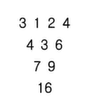

In [ ]:
# 접근법: 다 해보기
# 이항계수 빼고는 이제 만들줄 알게됨
# 1~4까지의 모든 조합 출력

def DFS(L):
  if L == (n):
    for j in res:
      print(j, end = ' ')
    print()
  else:
    for i in range(1, n+1):
      if ch[i] == 0:
        ch[i] = 1
        res[L] = i
        DFS(L+1)
        ch[i] = 0


if __name__ == "__main__":
  n, m  = map(int, input().split()) #1~n까지의 수, 최종 합 f
  res = [0]*n # 1~n까지의 조합(순열)
  ch = [0]*(n+1) # 중복 방지용 체크
  DFS(0)

4 16
1 2 3 4 
1 2 4 3 
1 3 2 4 
1 3 4 2 
1 4 2 3 
1 4 3 2 
2 1 3 4 
2 1 4 3 
2 3 1 4 
2 3 4 1 
2 4 1 3 
2 4 3 1 
3 1 2 4 
3 1 4 2 
3 2 1 4 
3 2 4 1 
3 4 1 2 
3 4 2 1 
4 1 2 3 
4 1 3 2 
4 2 1 3 
4 2 3 1 
4 3 1 2 
4 3 2 1 


In [ ]:
import sys

def DFS(L, sum): #누적이 sum
  if (L == n) and (sum == f):
    for x in p:
      print(x, end = ' ')
    sys.exit(0) #프로세스를 종료
  else:
    for j in range(1, n+1):
      if ch[j] == 0: # 중복을 방지
        ch[j] = 1 # 다녀갔음을 체크
        p[L] = j
        DFS(L+1, sum+(p[L]*b[L]))
        ch[j] = 0


if __name__ == "__main__":
  n, f  = map(int, input().split()) #1~n까지의 수, 최종 합 f
  p = [0]*n # 1~n까지의 조합(순열)
  b = [1]*n # 함께 곱해줄 이항계수(어케 구하는가..!), 맨끝은 1이라 초기화를 1로 해줌
  ch = [0]*(n+1) # 중복 방지용 체크
  for i in range(1, n):
    b[i] = b[i-1]*(n-i)//i
  DFS(0, 0)

4 16
3 1 2 4 
3 2 1 4 
4 1 2 3 
4 2 1 3 


## 10. 조합 구하기
1부터 n까지 번호가 적힌 구슬. 그 중 m개를 뽑는 방법의 수를 출력
- 입력: 자연수 n, m
-출력: 뽑는 경우의 수와 총 경우의 수

직접 푼 코드:
- 불필요한 ch리스트
- 현재 있는 수(j)보다 +1큰 수에 대해 순회하여 중복을 피함
- s는 모든 경우에서 1이므로 +1하면 2부터 계산해줄것임: 그래서 (3, 2), (4, 2), (4, 3)과 같은 경우의 수가 정답으로 출력됨
- 유의하기

In [ ]:
# 직접 푼 코드: 중복을 해결하기 어려움...! - ch리스트 필요없음 / j+1로 수정하면

def DFS(L, s):
  global cnt
  if (L == m) & (s<=n):
    for i in range(len(res)):
      print(res[i], end = ' ')
    print()
    cnt+=1
  else:
    for j in range(s, n+1): #시작점 ~ n+1
      if ch[j] == 0: # 다녀가지 않은 경우
        ch[j] = 1 # 방문처리
        res[L] = j # 리스트에 숫자 넣기
        DFS(L+1, s+1) #현재 있는 i보다 큰 수에서 시작해야함
        ch[j]=0

if __name__ == "__main__":
  n, m = map(int, input().split())
  cnt = 0
  res = [0]*m
  ch = [0]*(n+1)
  DFS(0, 1)
  print(cnt)



4 2
1 2 
1 3 
1 4 
2 3 
2 4 
3 2 
3 4 
4 2 
4 3 
9


In [3]:
def DFS(L, s):
  global cnt
  if (L == m):
    for j in range(L):
      print(res[j], end = ' ')
    print()
    cnt+=1
  else:
    for i in range(s, n+1): #시작점 ~ n+1
      res[L] = i
      DFS(L+1, i+1) #시작점의 다음 수부터 시작함

if __name__ == "__main__":
  n, m = map(int, input().split())
  cnt = 0
  res = [0]*(m)
  DFS(0, 1)
  print(cnt)

4 2
1 2 
1 3 
1 4 
2 3 
2 4 
3 4 
6


## 11. 수들의 조합
N개의 정수가 주어지면 그 숫자들 중 K개를 뽑는 조합의 합의 임의의 정수 M의 배수인 개수는 몇개가 있는지 출력하는 프로그램 작성
- 입력:
  - 정수의 개수 N, 임의의 정수 K
  - N개의 정수
  - M
- 출력: 총 가지수


In [22]:
## 직접 푼 풀이!! 아주 잘 풀었음!!! 정답풀이랑 다르게 sum은 인자로 받지않고 따로 계산함

def DFS(L, s):
  global res_sum_list
  if L == k:
    res_sum_list.append(sum(res))
  else:
    for j in range(s, n+1):
        res[L] = n_list[j-1]
        DFS(L+1, j+1)

if __name__ == '__main__':
  n, k = map(int, input().split())
  n_list = list(map(int, input().split()))
  m = int(input())
  res = [0]*k
  # 경우에 맞는 정수들의 합 리스트
  res_sum_list = []
  DFS(0, 1)
  # print(res_sum_list)
  ans = [i for i in res_sum_list if i%m == 0]

  print(len(ans))

5 3
2 4 5 8 12
6
2


In [29]:
# 선생님 설명 듣고 직접 풂: a리스트의 index가 0부터 시작해서 그거때문에 range를 n까지로 줄어야함, 대신 i가 0부터 시작!

def DFS(L, s, sum):
  global cnt
  if L == k:
    #print(res)
    if sum%m == 0:
      cnt+=1
  else:
    for i in range(s, n):
      res[L] = a[i]
      DFS(L+1, i+1, sum+a[i])


if __name__ == "__main__":
  n, k = map(int, input().split())
  a = list(map(int, input().split()))
  m = int(input())
  cnt = 0
  res = [0]*k
  DFS(0, 0, 0)
  print(cnt)

5 3
2 4 5 8 12
6
[2, 4, 5]
[2, 4, 8]
[2, 4, 12]
[2, 5, 8]
[2, 5, 12]
[2, 8, 12]
[4, 5, 8]
[4, 5, 12]
[4, 8, 12]
[5, 8, 12]
2


In [30]:
## 정답코드: res리스트도 필요하지않음..! sum이 있으니까..!

def DFS(L, s, sum):
  global cnt
  if L == k:
    #print(res)
    if sum%m == 0:
      cnt+=1
  else:
    for i in range(s, n): #자료가 index로 0~n-1까지의 인덱스가 있어서 s~n임.
      DFS(L+1, i+1, sum+a[i])

if __name__ == "__main__":
  n, k = map(int, input().split())
  a = list(map(int, input().split()))
  m = int(input())
  cnt = 0
  DFS(0, 0, 0)
  print(cnt)

5 3
2 4 5 8 12
6
2


## 12.수열 추측하기(itertools사용)
가장 윗줄에서부터 N까지의 숫자가 한 개씩 적혀있음.<br>
둘째줄부터 파스칼의 삼각형처럼 위의 두개를 더한 값이 저장됨.<br>
N과 가장 밑에 있는 숫자가 주어졌을 떄 가장 윗줄에 있는 숫자를 구하는 프로그램<br>
*답이 여러가지가 나오는 경우 사전순으로 가장 앞에 오는 것을 출력
- 입력: 4 16
- 출력: 3 1 2 4

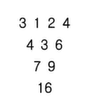

In [52]:
import itertools as it


n, f = map(int, input().split())

b = [1]*n #계수에 대한 정보

for i in range(1, n):
  b[i] = b[i-1]*(n-i)/i

a=list(range(1, n+1))

for tmp in it.permutations(a):
  sum = 0
  for L, x in enumerate(tmp):
    sum+=(b[L]*x)
  if int(sum) == f:
    for x in tmp:
      print(x, end = ' ')
    break

4 16
3 1 2 4 

In [35]:
import itertools as it
n=4
a=list(range(1, n+1))
for tmp in it.permutations(a, 3): #4개 중 3개만 뽑기
  print(tmp)

(1, 2, 3)
(1, 2, 4)
(1, 3, 2)
(1, 3, 4)
(1, 4, 2)
(1, 4, 3)
(2, 1, 3)
(2, 1, 4)
(2, 3, 1)
(2, 3, 4)
(2, 4, 1)
(2, 4, 3)
(3, 1, 2)
(3, 1, 4)
(3, 2, 1)
(3, 2, 4)
(3, 4, 1)
(3, 4, 2)
(4, 1, 2)
(4, 1, 3)
(4, 2, 1)
(4, 2, 3)
(4, 3, 1)
(4, 3, 2)


## 라이브러리를 이용한 조합
N개의 정수가 주어지면 그 숫자들 중 K개를 뽑는 조합의 합의 임의의 정수 M의 배수인 개수는 몇개가 있는지 출력하는 프로그램 작성
- 입력:
  - 정수의 개수 N, 임의의 정수 K
  - N개의 정수
  - M
- 출력: 총 가지수

In [2]:
import itertools as it
n, k = map(int, input().split())
a = list(map(int, input().split()))
m = int(input())
cnt=0

for x in it.combinations(a, k):
  if sum(x) % m == 0:
    cnt+=1
print(cnt)

5 3
2 4 5 8 12
6
2


## 14. 인접행렬(가중치 방향그래프)
아래 그림과 같은 그래프정보를 인접행렬로 표현해보세요


무방향 그래프: 행렬에 대해 갈 수 있다면 표기됨

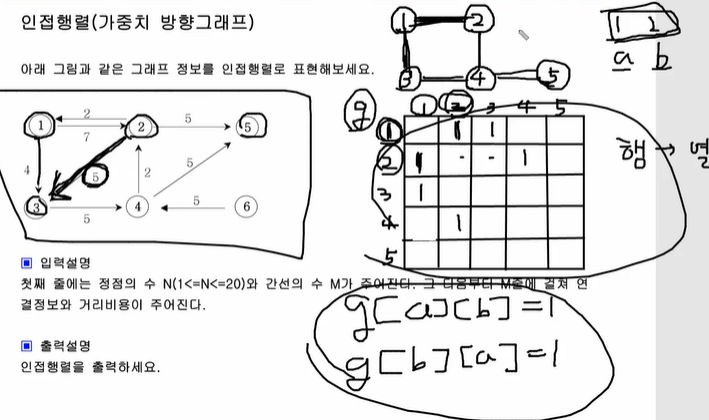

In [4]:
## 무방향 그래프
# 노드번호 n, 간선개수 m
'''
간선은
1 2
2 3
2 5
4 5
1 5
이런식으로 주어짐
'''
n, m = map(int, input().split())
g = [[0]*(n+1) for _ in range(n+1)] # (n+1)(n+1)행렬

# 간선정보
for i in range(m):
  a, b = map(int, input().split())
  g[a][b] = 1
  g[b][a] = 1


for i in range(1, n+1):
  for j in range(1, n+1):
    print(g[i][j], end = ' ')
  print()



5 5
1 2
3 5
2 5
4 5
2 3
0 1 0 0 0 
1 0 1 0 1 
0 1 0 0 1 
0 0 0 0 1 
0 1 1 1 0 


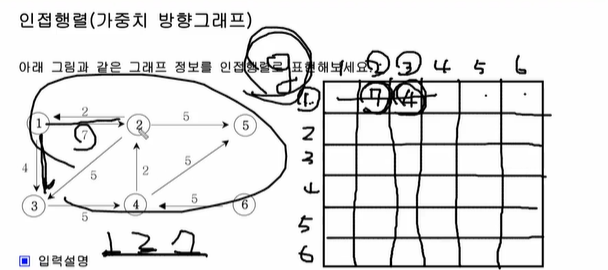

In [5]:
## 방향 가중치 그래프
"""
간선은

1(행) 2(열) 7(가중치)

의 형식으로 주어짐

1 2 7
1 3 4
2 1 2
2 3 5
2 5 5
3 4 5
4 2 2
4 5 5
6 4 5
"""
n, m = map(int, input().split())
g = [[0]*(n+1) for _ in range(n+1)] # (n+1)(n+1)행렬

# 간선정보
for i in range(m):
  # 행, 열, 가중치
  a, b, c = map(int, input().split())
  g[a][b] = c


for i in range(1, n+1):
  for j in range(1, n+1):
    print(g[i][j], end = ' ')
  print()

6 9
1 2 7
1 3 4
2 1 2
2 3 5
2 5 5
3 4 5
4 2 2
4 5 5
6 4 5
0 7 4 0 0 0 
2 0 5 0 5 0 
0 0 0 5 0 0 
0 2 0 0 5 0 
0 0 0 0 0 0 
0 0 0 5 0 0 


## 15. 경로탐색(그래프 DFS)

방향그래프가 주어지면 1번 정점에서 N번 정점까지 가는 모든 경로의 가지 수를 출력하는 프로그램을 작성하세요.<br>
한 번 방문한 노드는 다시 방문하지않게끔 check list를 만들기

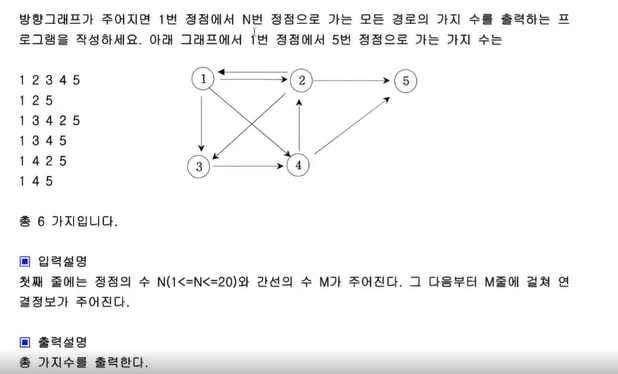

In [ ]:
# 한 번 방문한 노드는 다시 방문하지않게끔

def DFS(v):
  global cnt
  if v == n:
    cnt+=1
  else:
    for j in range(1, n+1):
      if (g[v][j] == 1) and (ch[j] == 0): #방향그래프에서 간선이 있고 미방분했다면
        ch[j] = 1 #방문처리
        DFS(i)
        ch[i] = 0 #체크한 부분을 풀어줌


if __name__ == '__main__':
  n, m = map(int, input().split())
  g = [[0]*(n+1) for _ in range(n+1)] #1번부터 n번까지 써야함
  ch = []*(n+1) # 방문한 노드인지 확인
  for i in range(m):
    a, b = map(int, input().split())
    g[a][b] = 1 #방향그래프
  cnt = 0
  ch[1] = 1
  DFS(1)
  print(cnt)

In [10]:
# 경로들까지 확인하는 코드
def DFS(v):
  global cnt
  if v == n:
    cnt+=1
    for x in path:
      print(x, end = ' ')
    print()
  else:
    for j in range(1, n+1):
      if (g[v][j] == 1) & (ch[j] == 0): #방향그래프에서 간선이 있고 미방분했다면
        ch[j] = 1 #방문처리
        path.append(j)
        DFS(j)
        path.pop() #넣었던 것을 빼줌
        ch[j] = 0 #체크한 부분을 풀어줌


if __name__ == '__main__':
  n, m = map(int, input().split())
  g = [[0]*(n+1) for _ in range(n+1)] #1번부터 n번까지 써야함
  ch = [0]*(n+1) # 방문한 노드인지 확인
  for i in range(m):
    a, b = map(int, input().split())
    g[a][b] = 1 #방향그래프
  cnt = 0
  # 경로를 확인할 수 있는 리스트
  path = []
  path.append(1)
  ch[1] = 1
  DFS(1)
  print(cnt)

5 9
1 2
1 3
1 4
2 1
2 3
2 5
3 4
4 2
4 5
1 2 3 4 5 
1 2 5 
1 3 4 2 5 
1 3 4 5 
1 4 2 5 
1 4 5 
6
